## Практика 9: Кластерний  аналіз

In [56]:
library(ggplot2)
library(dplyr)
library(mvtnorm)             
library(mclust)
#library(magrittr)
#library(ellipse)
#library(tidyr)

In [57]:
options(repr.plot.width=4, repr.plot.height=4)

### Приклад 1. 

Завантажимо  таблицю, в якій вказані дані по злочинності у містах (див. Таблиця~15.13 Rencher).

In [45]:
city<-read.table("T14_1_CITYCRIME.dat")
head(city)

V1,V2,V3,V4,V5,V6,V7,V8
Atlanta,16.5,24.8,106,147,1112,905,494
Boston,4.2,13.3,122,90,982,669,954
Chicago,11.6,24.7,340,242,808,609,645
Dallas,18.1,34.2,184,293,1668,901,602
Denver,6.9,41.5,173,191,1534,1368,780
Detroit,13.0,35.7,477,220,1566,1183,788


Для виконання ієархічної кластерізації використаємо функцію hclust; за замовченням, використовується евклідова відстань. 

In [46]:
hc<- hclust(dist(city[,2:8]))
hc


Call:
hclust(d = dist(city[, 2:8]))

Cluster method   : complete 
Distance         : euclidean 
Number of objects: 16 


In [49]:
attributes(hc)

$names
[1] "merge"       "height"      "order"       "labels"      "method"     
[6] "call"        "dist.method"

$class
[1] "hclust"

Якщо потрібно змініти відстань, треба задати інший параметр в method, наприклад, method="manhattan": 
$$
d(x,y) := \sum_{j=1}^n |x_i-y_j|. 
$$

In [52]:
hc1 <- hclust(dist(city[,2:8], method  ="manhattan"))
hc1


Call:
hclust(d = dist(city[, 2:8], method = "manhattan"))

Cluster method   : complete 
Distance         : manhattan 
Number of objects: 16 


У даному випадку всі ці методи дають однакові результати. 
Намалюємо дендрограму: 

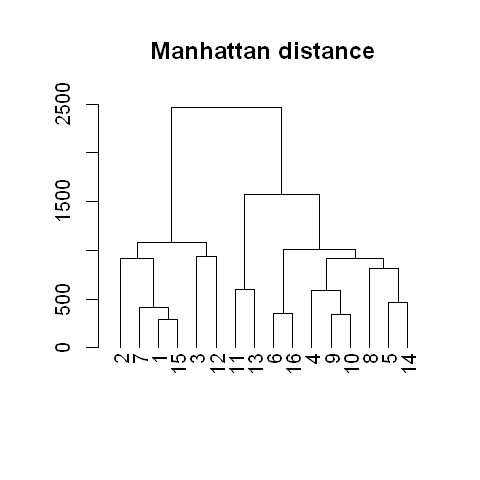

In [53]:
hcd1 <- as.dendrogram(hc1)
plot(hcd1, main = "Manhattan distance")

Застосуємо тепер метод $к$ середніх: 

In [54]:
kmeans.city<-kmeans(city[,2:8], 4, iter.max = 10, nstart = 1) 
kmeans.city

K-means clustering with 4 clusters of sizes 6, 4, 3, 3

Cluster means:
         V2       V3        V4       V5        V6        V7       V8
1 11.133333 27.88333 241.83333 182.3333 1525.6667 1004.8333 654.6667
2  9.750000 37.10000 364.50000 258.2500 1669.0000 1332.2500 819.5000
3  8.033333 18.83333  86.33333 132.6667 1111.6667  795.0000 481.3333
4  8.700000 25.90000 242.66667 205.0000  948.6667  771.3333 791.6667

Clustering vector:
 [1] 3 4 4 1 2 2 3 1 1 1 2 4 2 1 3 1

Within cluster sum of squares by cluster:
[1] 399379.27 214621.01  39170.38 233038.53
 (between_SS / total_SS =  72.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

Розподіл по кластерам:

In [55]:
kmeans.city$cluster

[1] 3 4 4 1 2 2 3 1 1 1 2 4 2 1 3 1

### Приклад 2. 

Розглянемо метод сумішей. Ми зробимо кластерізацію використовуючи пакет mclust. Ми згенеруємо гаусівську суміш і 

Ще приклади для пакету mclust: https://cran.r-project.org/web/packages/mclust/vignettes/mclust.html та  https://cran.r-project.org/web/packages/mclust/index.html

In [3]:
m_1 <- c(1,1)
m_2 <- c(3,4)
m_3 <- c(5,5)
sig_1<- matrix(c(1, -.5, -.5, 1), nrow =2, byrow= FALSE)
sig_2<- matrix(c(2, -.5, -.5, 2), nrow =2, byrow= FALSE)
sig_3<- matrix(c(1, 0, 0, 1), nrow =2, byrow= FALSE)
mv_1<-rmvnorm(30, m_1, sig_1)  
mv_2<-rmvnorm(20, m_2, sig_2)  
mv_3<-rmvnorm(50, m_3, sig_3)  

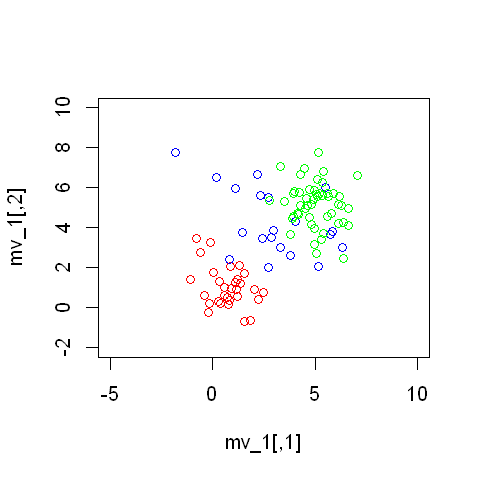

In [8]:
plot(mv_1, col = "red", xlim=c(-5,10), ylim=c(-2,10))  
points(mv_2, col= "blue") 
points(mv_3, col= "green") 

In [12]:
X <- rbind(mv_1,mv_2,mv_3)

In [17]:
data_1 = Mclust(X, G = 3)
data_1

'Mclust' model object: (EII,3) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

In [34]:
summary(data_1)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EII (spherical, equal volume) model with 3 components: 

 log-likelihood   n df      BIC       ICL
      -381.5052 100  9 -804.457 -808.0755

Clustering table:
 1  2  3 
33  3 64 

Тут
$$
BIC= - 2 \ln L(X,\theta) + k \ln n, 
$$
де $L(X,\theta)$ - функція вирогідностей,  $n$ - кількість спостережень, $k$ - кількість незалежних параметрів.  
(див. https://sites.stat.washington.edu/raftery/Research/PDF/fraley1998.pdf

та 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5096736/

У нас кількість незалежних параметрів 9,  $ln L(X,\theta)  =-381.5052$. Пакет mclust бере цю величину зі знаком +, тому

In [41]:
2*381.5052 +9 * log(100)

[1] 804.4569

In [15]:
table(data_1$classification)


 1  2  3 
33  3 64 

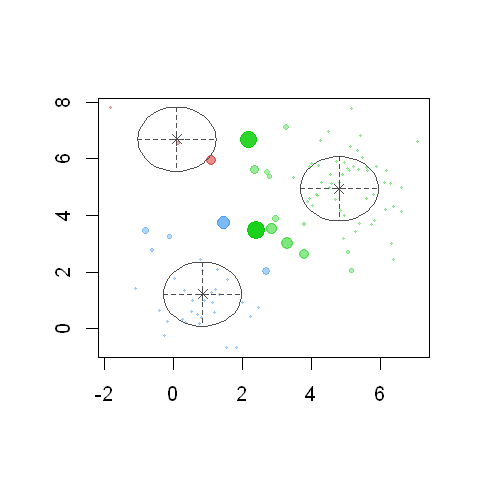

In [16]:
plot(data_1, what = "uncertainty")


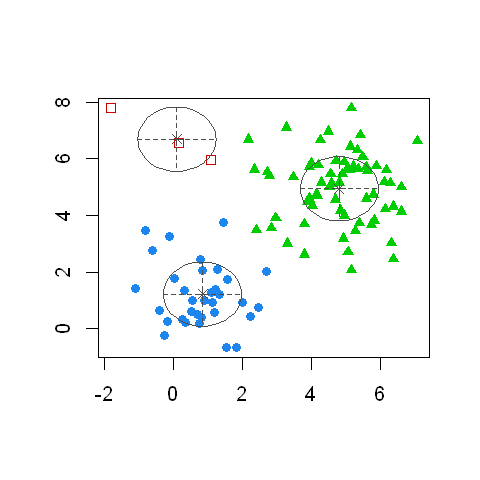

In [19]:
plot(data_1, what = "classification")

Визначимо кільксть спостережень. 

In [30]:
number_of_obs <- 300

In [66]:
# Gaussian 1: Heads
gauss_1 <- rnorm(n = number_of_obs, mean = 5, sd = 2)

# Gaussian 2: Tails
gauss_2 <- rnorm(n = number_of_obs, mean = 0, sd = 1)


gauss_3 <- rnorm(n= number_of_obs,mean= 10, sd = 1)


proportions <- sample(c(1, 2,3), number_of_obs,
                       replace = TRUE, prob =c(1/3, 1/4, 5/12))

mixture_simulation <- data.frame(x = ifelse(proportions == 0, gauss_1,
                                            ifelse(proportions == 1, gauss_2, gauss_3)))


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


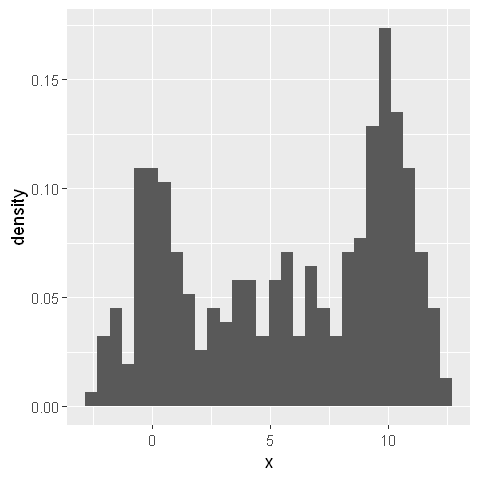

In [69]:
ggplot(mixture_simulation) +  geom_histogram(aes(x=x, y =..density..))

In [72]:
m_1 <- c(1,1)
m_2 <- c(3,4)
m_3 <- c(5,5)
sig_1<- matrix(c(1, -.5, -.5, 1), nrow =2, byrow= FALSE)
sig_2<- matrix(c(2, -.5, -.5, 2), nrow =2, byrow= FALSE)
sig_3<- matrix(c(1, 0, 0, 1), nrow =2, byrow= FALSE)
mv_1<-rmvnorm(100, m_1, sig_1)  
mv_2<-rmvnorm(100, m_2, sig_2)  
mv_3<-rmvnorm(100, m_3, sig_3)  
mixture_mult <- data.frame( class = proportions, x = ifelse(proportions == 0, mv_1[1],
                                            ifelse(proportions == 1, mv_2[1], mv_3[1])), 
                           y = ifelse(proportions == 0, mv_1[2],
                                            ifelse(proportions == 1, mv_2[2], mv_3[2])))
#print(mv_1)
X = mixture_mult

[1] 2 1 3 1 2 1


In [50]:
dat1 = Mclust(mixture_simulation, G = 2)

In [51]:
summary(dat1)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust V (univariate, unequal variance) model with 2 components: 

 log-likelihood   n df       BIC       ICL
      -795.9084 300  5 -1620.336 -1640.765

Clustering table:
  1   2 
179 121 

In [52]:
table(dat1$classification)


  1   2 
179 121 

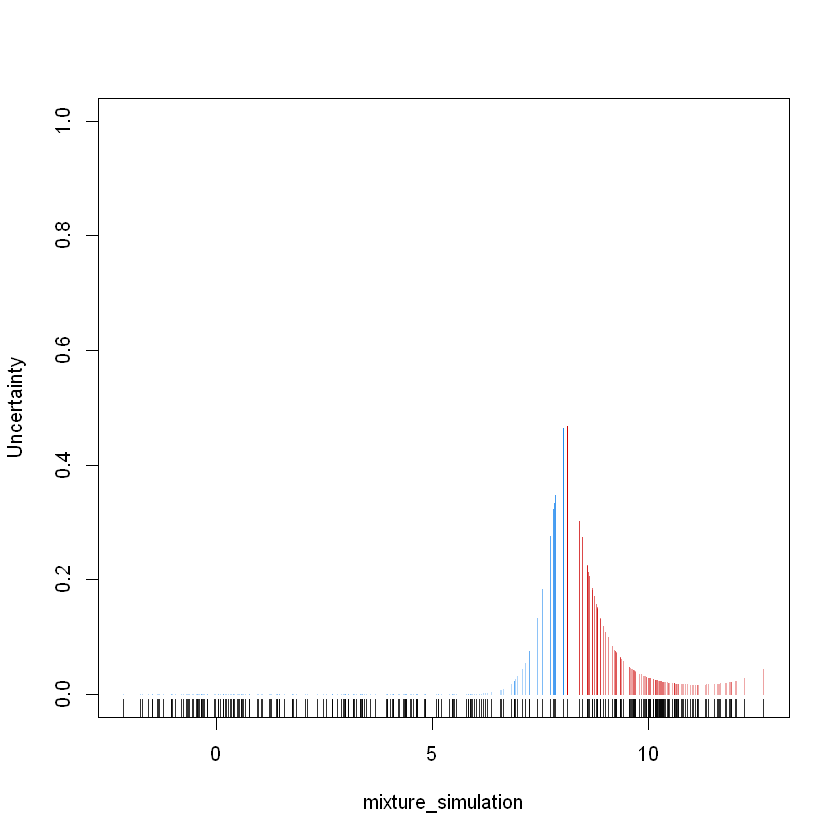

In [53]:
plot(dat1, what = "uncertainty")


Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


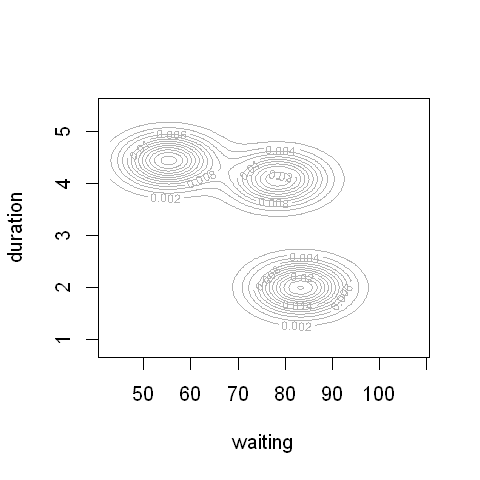

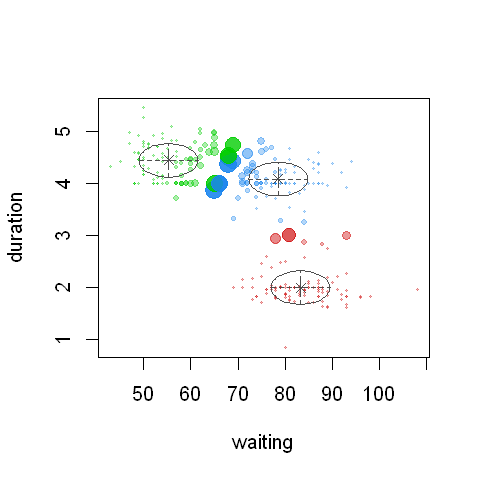

In [93]:
data(geyser, package = 'MASS')

url <- "https://koalaverse.github.io/homlr/data/my_basket.csv"
my_basket <- readr::read_csv(url)
# Apply GMM model with 3 components
geyser_mc <- Mclust(geyser, G = 3)

# Plot results
plot(geyser_mc, what = "density")
plot(geyser_mc, what = "uncertainty")

In [95]:
typeof(geyser)

[1] "list"

In [96]:
typeof(mixture_mult)

[1] "list"

In [79]:
class <- mixture_mult$class

In [78]:
mix_mc <- MclustDA(mixture_mult, G = 3)

ERROR: Error in MclustDA(mixture_mult, G = 3): class labels for training data must be provided!


In [83]:
summary(mixture_mult)

     class             x               y        
 Min.   :1.000   Min.   :3.339   Min.   :3.931  
 1st Qu.:1.000   1st Qu.:3.339   1st Qu.:3.931  
 Median :2.000   Median :4.738   Median :3.931  
 Mean   :2.093   Mean   :4.272   Mean   :3.979  
 3rd Qu.:3.000   3rd Qu.:4.738   3rd Qu.:4.074  
 Max.   :3.000   Max.   :4.738   Max.   :4.074  

In [ ]:
plot(mix_mc, what = "density")
plot(mix_mc, what = "uncertainty")

https://cran.r-project.org/web/packages/mclust/vignettes/mclust.html

In [21]:
data(diabetes)
class <- diabetes$class
table(class)
print(head(diabetes))

class
Chemical   Normal    Overt 
      36       76       33 

   class glucose insulin sspg
1 Normal      80     356  124
2 Normal      97     289  117
3 Normal     105     319  143
4 Normal      90     356  199
5 Normal      90     323  240
6 Normal      86     381  157


In [18]:
X <- diabetes[,-1]
head(X)

glucose,insulin,sspg
80,356,124
97,289,117
105,319,143
90,356,199
90,323,240
86,381,157


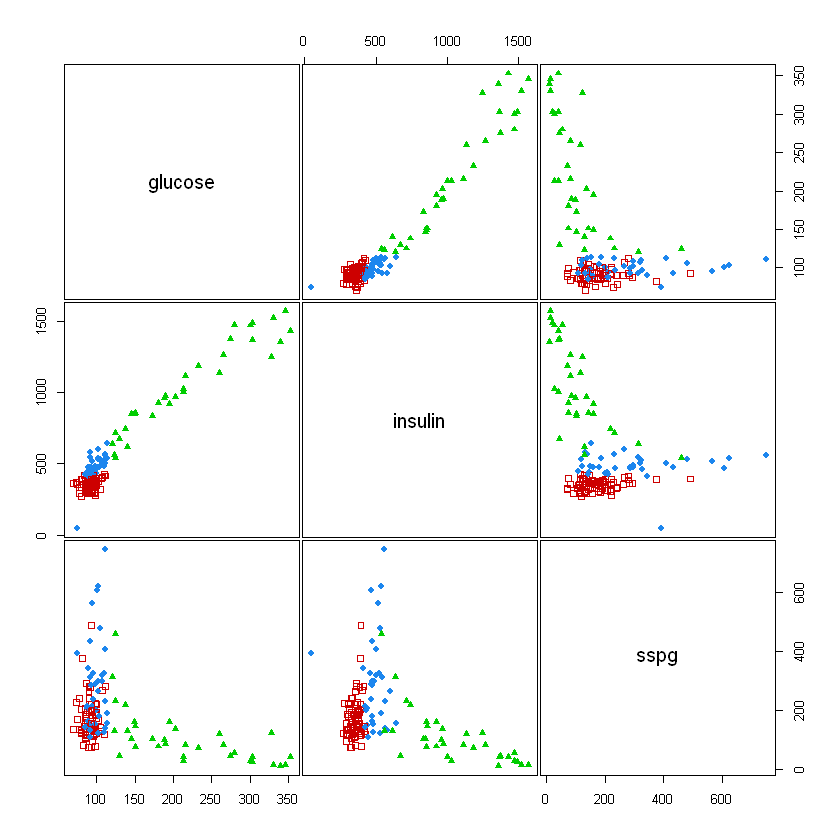

In [19]:
clPairs(X, class)

In [23]:
BIC <- mclustBIC(X)
mod1 <- Mclust(X, x = BIC)
summary(mod1, parameters = TRUE)

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust VVV (ellipsoidal, varying volume, shape, and orientation) model with 3
components: 

 log-likelihood   n df       BIC       ICL
      -2303.496 145 29 -4751.316 -4770.169

Clustering table:
 1  2  3 
81 36 28 

Mixing probabilities:
        1         2         3 
0.5368974 0.2650129 0.1980897 

Means:
             [,1]     [,2]       [,3]
glucose  90.96239 104.5335  229.42136
insulin 357.79083 494.8259 1098.25990
sspg    163.74858 309.5583   81.60001

Variances:
[,,1]
         glucose    insulin       sspg
glucose 57.18044   75.83206   14.73199
insulin 75.83206 2101.76553  322.82294
sspg    14.73199  322.82294 2416.99074
[,,2]
          glucose   insulin       sspg
glucose  185.0290  1282.340  -509.7313
insulin 1282.3398 14039.283 -2559.0251
sspg    -509.7313 -2559.025 23835.7278
[,,3]
          glucose   insulin      

In [24]:
table(class, mod1$classification)

          
class       1  2  3
  Chemical  9 26  1
  Normal   72  4  0
  Overt     0  6 27

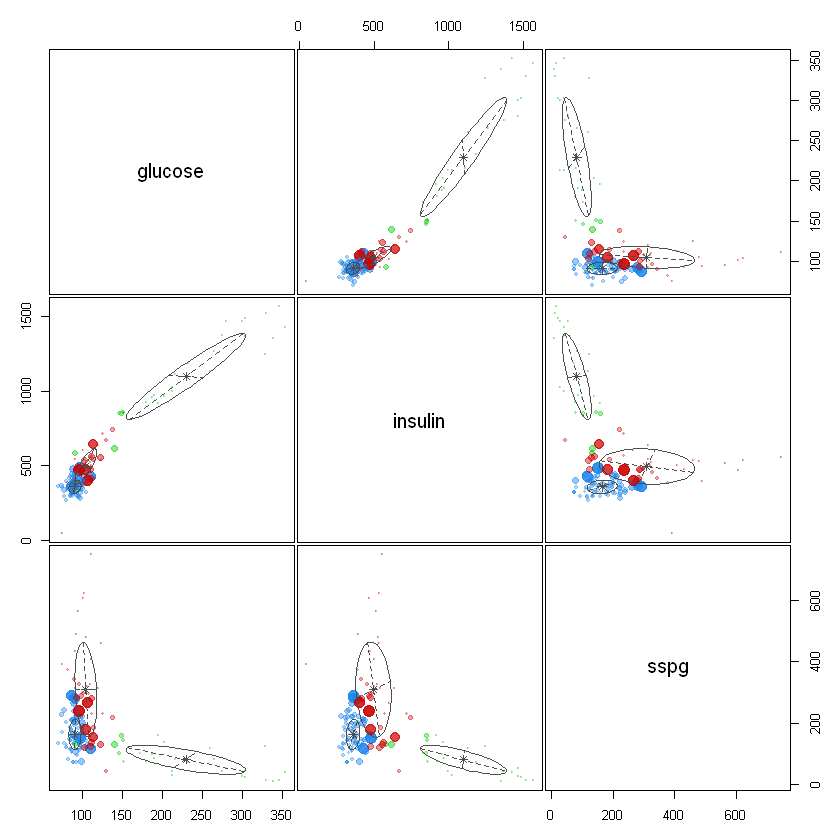

In [26]:
plot(mod1, what = "uncertainty")
